In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
import sklearn

In [2]:
df = pd.read_csv('Bank_Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df = pd.read_csv('Bank_Churn_Modelling.csv')
df.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
def print_unique_values(df):
    for col in df:
        print(f'{col}: {df[col].unique()}')
print_unique_values(df)   


CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Scaling the columns

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ["CreditScore","Age", "Balance","EstimatedSalary"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df["Tenure"] = df["Tenure"]/10
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,2,1,0,0.481341,0
9996,0.332,France,Male,0.229730,1.0,0.228657,1,1,1,0.508490,0
9997,0.718,France,Female,0.243243,0.7,0.000000,1,0,1,0.210390,1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,2,1,0,0.464429,1


In [7]:
df[df.isnull()==False] #No null value

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,2,1,0,0.481341,0
9996,0.332,France,Male,0.229730,1.0,0.228657,1,1,1,0.508490,0
9997,0.718,France,Female,0.243243,0.7,0.000000,1,0,1,0.210390,1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,2,1,0,0.464429,1


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


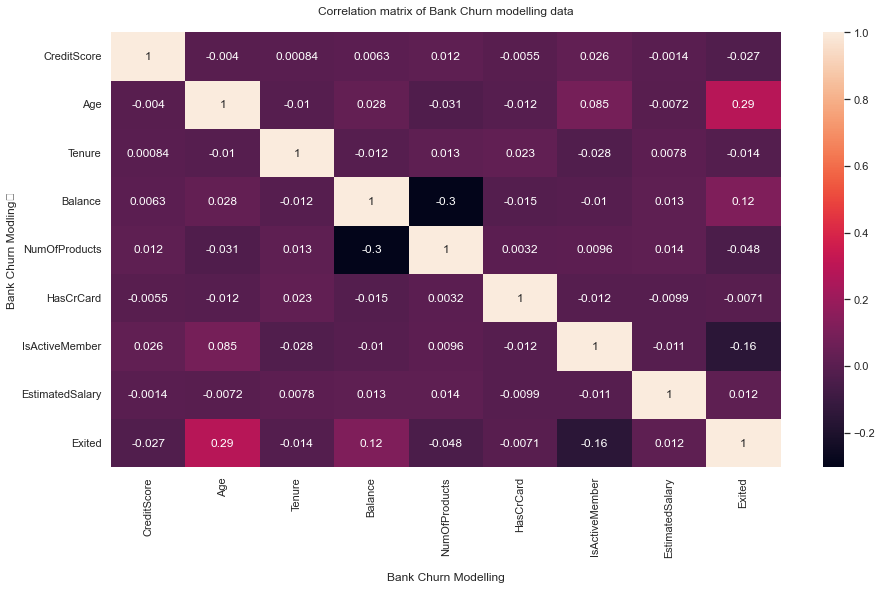

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})
hm = sns.heatmap(df.corr(), annot = True)

hm.set(xlabel='\nBank Churn Modelling', ylabel='Bank Churn Modling\t', title = "Correlation matrix of Bank Churn modelling data\n")

plt.show()

In [9]:
m = df[df["Balance"]<0.5]
m[df["Exited"]>0]


<ipython-input-9-bd0f9f321485>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m[df["Exited"]>0]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
5,0.590,Spain,Male,0.351351,0.8,0.453394,2,1,0,0.748797,1
7,0.052,Germany,Female,0.148649,0.4,0.458540,4,1,0,0.596733,1
22,0.320,Spain,Female,0.270270,0.4,0.000000,1,1,0,0.594567,1
30,0.482,Spain,Female,0.283784,0.3,0.000000,3,1,0,0.702356,1
...,...,...,...,...,...,...,...,...,...,...,...
9962,0.704,Spain,Male,0.351351,0.9,0.000000,1,0,0,0.296007,1
9975,0.520,Germany,Male,0.432432,0.1,0.454196,2,1,0,0.982669,1
9991,0.494,France,Female,0.472973,0.4,0.352259,1,1,0,0.346899,1
9997,0.718,France,Female,0.243243,0.7,0.000000,1,0,1,0.210390,1


In [10]:
df.replace({"Female": 1, "Male":0}, inplace=True)
df.replace({"France": 1, "Spain":2,"Germany":3}, inplace=True)
df.dtypes

CreditScore        float64
Geography            int64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,1,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,2,1,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,1,1,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,1,1,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,2,1,0.337838,0.2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0,0.283784,0.5,0.000000,2,1,0,0.481341,0
9996,0.332,1,0,0.229730,1.0,0.228657,1,1,1,0.508490,0
9997,0.718,1,1,0.243243,0.7,0.000000,1,0,1,0.210390,1
9998,0.844,3,0,0.324324,0.3,0.299226,2,1,0,0.464429,1


In [12]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,1,0.324324,0.2,0.000000,1,1,1,0.506735,1
2,0.304,1,1,0.324324,0.8,0.636357,3,1,0,0.569654,1
5,0.590,2,0,0.351351,0.8,0.453394,2,1,0,0.748797,1
7,0.052,3,1,0.148649,0.4,0.458540,4,1,0,0.596733,1
16,0.606,3,0,0.540541,0.1,0.528513,1,1,0,0.025433,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,3,0,0.324324,0.3,0.605982,1,1,1,0.267193,1
9982,0.610,3,1,0.378378,0.7,0.546617,1,1,0,0.575729,1
9991,0.494,1,1,0.472973,0.4,0.352259,1,1,0,0.346899,1
9997,0.718,1,1,0.243243,0.7,0.000000,1,0,1,0.210390,1


In [13]:
X_Exit_1 = df[df.Exited==1].sample(1000)
X_Exit_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1219,0.686,3,0,0.351351,0.5,0.496622,2,1,1,0.234955,1
2752,0.696,2,1,0.175676,0.8,0.737663,1,0,0,0.576686,1
6633,0.758,2,1,0.324324,0.7,0.000000,2,1,0,0.291311,1
9877,0.310,3,1,0.202703,0.3,0.424502,3,1,0,0.227193,1
4921,0.352,2,1,0.202703,0.8,0.456897,2,1,0,0.550567,1
...,...,...,...,...,...,...,...,...,...,...,...
4336,0.460,3,0,0.270270,0.9,0.460116,2,1,0,0.642411,1
6014,0.370,2,0,0.405405,0.9,0.436322,1,1,0,0.786809,1
7080,0.556,3,1,0.445946,1.0,0.459471,2,0,0,0.063091,1
4136,0.602,1,0,0.351351,0.2,0.000000,3,1,0,0.512643,1


In [14]:

for j in df.T:
    if j in X_Exit_1.T:
        df.drop(j,inplace=True)
        

In [15]:
df.shape

(9000, 11)

In [16]:
X_Exit_0 = df[df.Exited==0].sample(1000)
X_Exit_0

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5165,1.000,1,0,0.202703,0.7,0.561810,1,0,0,0.017495,0
2922,0.670,2,0,0.216216,0.6,0.331865,1,0,0,0.048263,0
8283,0.628,1,0,0.527027,0.1,0.000000,2,1,1,0.282782,0
2143,0.938,1,0,0.270270,0.9,0.487585,2,1,1,0.907566,0
9795,0.312,1,0,0.337838,0.2,0.000000,2,1,0,0.527836,0
...,...,...,...,...,...,...,...,...,...,...,...
2841,0.902,1,0,0.270270,0.5,0.000000,2,1,0,0.331255,0
4119,0.640,1,0,0.243243,0.7,0.000000,2,0,0,0.297828,0
7411,0.552,3,1,0.067568,0.6,0.342362,1,1,0,0.548709,0
9675,0.770,2,0,0.283784,0.1,0.240635,1,1,0,0.201080,0


In [17]:
for j in df.T:
    if j in X_Exit_0.T:
        df.drop(j,inplace=True)

In [18]:
# y = df["Exited"]
# x = df.drop('Exited',axis=1)
# x
df.shape

(8000, 11)

In [19]:
test = pd.concat([X_Exit_1, X_Exit_0])
test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1219,0.686,3,0,0.351351,0.5,0.496622,2,1,1,0.234955,1
2752,0.696,2,1,0.175676,0.8,0.737663,1,0,0,0.576686,1
6633,0.758,2,1,0.324324,0.7,0.000000,2,1,0,0.291311,1
9877,0.310,3,1,0.202703,0.3,0.424502,3,1,0,0.227193,1
4921,0.352,2,1,0.202703,0.8,0.456897,2,1,0,0.550567,1
...,...,...,...,...,...,...,...,...,...,...,...
2841,0.902,1,0,0.270270,0.5,0.000000,2,1,0,0.331255,0
4119,0.640,1,0,0.243243,0.7,0.000000,2,0,0,0.297828,0
7411,0.552,3,1,0.067568,0.6,0.342362,1,1,0,0.548709,0
9675,0.770,2,0,0.283784,0.1,0.240635,1,1,0,0.201080,0


In [21]:
# len(y>0)

In [22]:
# y = df["Exited"]
# x = df.drop('Exited',axis=1)
y_test = test['Exited']
X_test = test.drop('Exited', axis=1)

In [23]:
y_test

1219    1
2752    1
6633    1
9877    1
4921    1
       ..
2841    0
4119    0
7411    0
9675    0
156     0
Name: Exited, Length: 2000, dtype: int64

In [32]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [33]:
y

1       0
2       1
3       0
4       0
6       0
       ..
9994    0
9995    0
9996    0
9997    1
9999    0
Name: Exited, Length: 8000, dtype: int64

In [26]:
!pip install imblearn

In [27]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 5)

In [28]:
y.value_counts()

0    6963
1    1037
Name: Exited, dtype: int64

In [29]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,0.516,2,1,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,1,1,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,1,1,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,2,1,0.337838,0.2,0.500246,1,1,1,0.395400,0
6,0.944,1,0,0.432432,0.7,0.000000,2,1,1,0.050261,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,0.900,1,1,0.148649,0.2,0.000000,2,0,0,0.838890,0
9995,0.842,1,0,0.283784,0.5,0.000000,2,1,0,0.481341,0
9996,0.332,1,0,0.229730,1.0,0.228657,1,1,1,0.508490,0
9997,0.718,1,1,0.243243,0.7,0.000000,1,0,1,0.210390,1


In [36]:
from imblearn.over_sampling import SMOTE


In [37]:
smote = SMOTE(sampling_strategy='minority')
X_sm = y_sm = smote.fit_resample(X,y)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X, y)
X_train = pd.DataFrame(X_train_oversampled, columns=X.columns)
# y_train = pd.DataFrame(y_train_oversampled, columns=y.columns)

In [38]:
y_train = X_sm[1] 

In [39]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1219,0.686,3,0,0.351351,0.5,0.496622,2,1,1,0.234955
2752,0.696,2,1,0.175676,0.8,0.737663,1,0,0,0.576686
6633,0.758,2,1,0.324324,0.7,0.000000,2,1,0,0.291311
9877,0.310,3,1,0.202703,0.3,0.424502,3,1,0,0.227193
4921,0.352,2,1,0.202703,0.8,0.456897,2,1,0,0.550567
...,...,...,...,...,...,...,...,...,...,...
2841,0.902,1,0,0.270270,0.5,0.000000,2,1,0,0.331255
4119,0.640,1,0,0.243243,0.7,0.000000,2,0,0,0.297828
7411,0.552,3,1,0.067568,0.6,0.342362,1,1,0,0.548709
9675,0.770,2,0,0.283784,0.1,0.240635,1,1,0,0.201080


In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
model= keras.Sequential([keras.layers.Dense(10,input_shape=(10,), activation='relu'),
                            keras.layers.Dense(10,activation='relu'),
                         keras.layers.Dense(10,activation='relu'),
                         keras.layers.Dense(20,activation='relu'),
                         keras.layers.Dense(20,activation='relu'),
                         keras.layers.Dense(40,activation='relu'),
                         keras.layers.Dense(30,activation='relu'),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(80,activation='relu'),
                         keras.layers.Dense(60,activation='sigmoid'),
                         keras.layers.Dense(70,activation='relu'),
                         keras.layers.Dense(90,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid'),
                         keras.layers.Dense(1,activation='sigmoid'),
                            
                            ])

In [42]:
%%timeit -n1 -r1 
with tf.device('GPU'):
    model.compile(optimizer='adam',
                 loss= 'binary_crossentropy',
                 metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=450)

    

Epoch 1/450
436/436 [==============================] - 4s 5ms/step - loss: 0.6502 - accuracy: 0.6303
Epoch 2/450
436/436 [==============================] - 2s 4ms/step - loss: 0.5808 - accuracy: 0.7072
Epoch 3/450
436/436 [==============================] - 2s 4ms/step - loss: 0.5448 - accuracy: 0.7370
Epoch 4/450
436/436 [==============================] - 2s 4ms/step - loss: 0.5223 - accuracy: 0.7550
Epoch 5/450
436/436 [==============================] - 2s 5ms/step - loss: 0.4988 - accuracy: 0.7700
Epoch 6/450
436/436 [==============================] - 2s 4ms/step - loss: 0.4846 - accuracy: 0.7775
Epoch 7/450
436/436 [==============================] - 2s 5ms/step - loss: 0.4734 - accuracy: 0.7786
Epoch 8/450
436/436 [==============================] - 2s 5ms/step - loss: 0.4655 - accuracy: 0.7815
Epoch 9/450
436/436 [==============================] - 2s 5ms/step - loss: 0.4626 - accuracy: 0.7831
Epoch 10/450
436/436 [==============================] - 2s 5ms/step - loss: 0.4519 - accura

436/436 [==============================] - 2s 5ms/step - loss: 0.3684 - accuracy: 0.8285
Epoch 82/450
436/436 [==============================] - 2s 5ms/step - loss: 0.3596 - accuracy: 0.8300
Epoch 83/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3633 - accuracy: 0.8298
Epoch 84/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3629 - accuracy: 0.8318
Epoch 85/450
436/436 [==============================] - 2s 5ms/step - loss: 0.3650 - accuracy: 0.8294
Epoch 86/450
436/436 [==============================] - 2s 5ms/step - loss: 0.3632 - accuracy: 0.8291
Epoch 87/450
436/436 [==============================] - 2s 5ms/step - loss: 0.3607 - accuracy: 0.8319
Epoch 88/450
436/436 [==============================] - 2s 5ms/step - loss: 0.3620 - accuracy: 0.8293
Epoch 89/450
436/436 [==============================] - 2s 5ms/step - loss: 0.3584 - accuracy: 0.8324
Epoch 90/450
436/436 [==============================] - 2s 5ms/step - loss: 0.3619 - accuracy: 

436/436 [==============================] - 2s 4ms/step - loss: 0.3288 - accuracy: 0.8488
Epoch 161/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.8534
Epoch 162/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3217 - accuracy: 0.8514
Epoch 163/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3248 - accuracy: 0.8528
Epoch 164/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3223 - accuracy: 0.8511
Epoch 165/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3244 - accuracy: 0.8537
Epoch 166/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3260 - accuracy: 0.8504
Epoch 167/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8539
Epoch 168/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3185 - accuracy: 0.8542
Epoch 169/450
436/436 [==============================] - 2s 4ms/step - loss: 0.3218 - a

436/436 [==============================] - 2s 4ms/step - loss: 0.2868 - accuracy: 0.8748
Epoch 240/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2801 - accuracy: 0.8784
Epoch 241/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2854 - accuracy: 0.8740
Epoch 242/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2849 - accuracy: 0.8725
Epoch 243/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2802 - accuracy: 0.8755
Epoch 244/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2816 - accuracy: 0.8763
Epoch 245/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2875 - accuracy: 0.8739
Epoch 246/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2841 - accuracy: 0.8763
Epoch 247/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2770 - accuracy: 0.8793
Epoch 248/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2804 - a

436/436 [==============================] - 2s 4ms/step - loss: 0.2631 - accuracy: 0.8883
Epoch 319/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2498 - accuracy: 0.8941
Epoch 320/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2529 - accuracy: 0.8906
Epoch 321/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2508 - accuracy: 0.8955
Epoch 322/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2573 - accuracy: 0.8896
Epoch 323/450
436/436 [==============================] - 2s 5ms/step - loss: 0.2513 - accuracy: 0.8930
Epoch 324/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2460 - accuracy: 0.8942
Epoch 325/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2475 - accuracy: 0.8921
Epoch 326/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2632 - accuracy: 0.8864
Epoch 327/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2512 - a

436/436 [==============================] - 2s 4ms/step - loss: 0.2323 - accuracy: 0.9021
Epoch 398/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2257 - accuracy: 0.9028
Epoch 399/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2244 - accuracy: 0.9050
Epoch 400/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2344 - accuracy: 0.8989
Epoch 401/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2235 - accuracy: 0.9075
Epoch 402/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2274 - accuracy: 0.9028
Epoch 403/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2307 - accuracy: 0.9015
Epoch 404/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2369 - accuracy: 0.8982
Epoch 405/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2264 - accuracy: 0.9040
Epoch 406/450
436/436 [==============================] - 2s 4ms/step - loss: 0.2306 - a

In [43]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 1.1058 - accuracy: 0.7045


[1.1058250665664673, 0.7045000195503235]

In [44]:
yp = model.predict(X_test)
yp[:5]

array([[0.17242676],
       [0.3898218 ],
       [0.00669553],
       [0.9980551 ],
       [0.8963094 ]], dtype=float32)

In [45]:
y_pred = []
for y in yp:
    if y>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred       

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,


In [46]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1000
           1       0.75      0.62      0.68      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000



Text(66.5, 0.5, 'Truth')

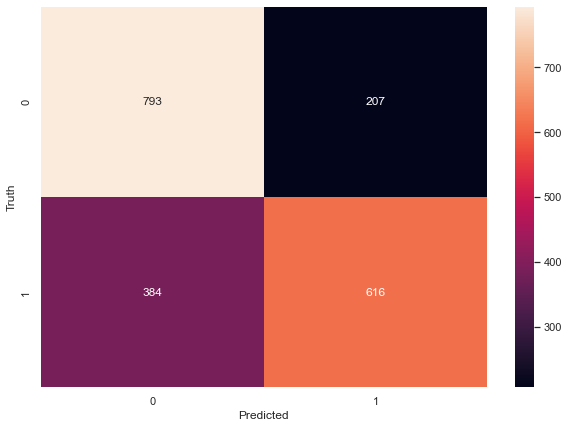

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
print("Accuracy  ", round((793+616)/(616+793+384+207),2))

Accuracy   0.7
